In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12, 8)

df = pd.read_csv("movies.csv")

In [36]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,533,5,0,2009,697,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009
7445,535,5,0,2019,184,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019
3045,6896,5,6,1997,705,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997
6663,5144,5,0,2015,699,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015
7244,536,5,0,2018,193,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018


In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df['budget'] = df['budget'].fillna(0)
df['budget'] = df['budget'].astype('int64')

In [6]:
df['gross'] = df['gross'].fillna(0)
df['gross'] = df['gross'].astype('int64')

In [ ]:
# create correct year column
df['released'] = df['released'].fillna(0)
df['year_correct'] = 0
for i in range(0, len(df['released'])):
    if ((i != 5728) and (i != 5730)):
        indexx = (df['released'][i].index('('))
        df['year_correct'][i] = df['released'][i][indexx-5:indexx]
    else:
        df['year_correct'][i] = 0

    # try:
    #     df['year_correct'][i] = df['released'][i][:4]
    # except:
    #     print(i)
# print(df['year_correct'][5728])

In [17]:
df.sort_values(by = ['gross'], inplace = True, ascending = False)


In [124]:
# pd.set_option('display.max_rows', None)

In [37]:
#drop any duplicates

df['company'].drop_duplicates().sort_values(ascending = False).head()

7129    2384
5664    2383
6412    2382
4007    2381
6793    2380
Name: company, dtype: int16

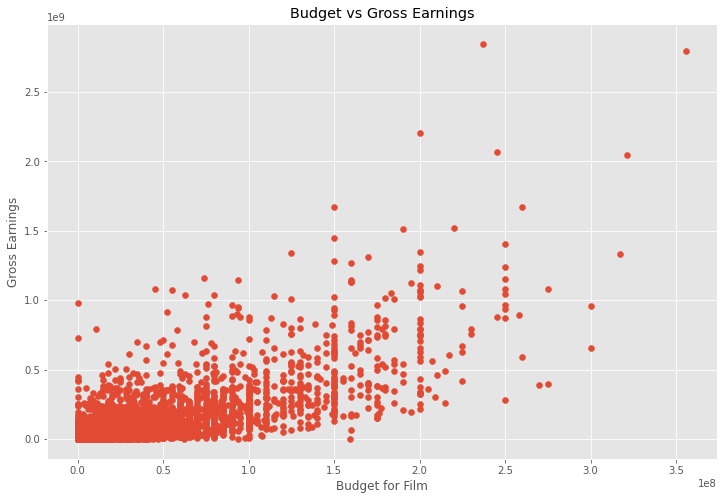

In [19]:
#scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [20]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

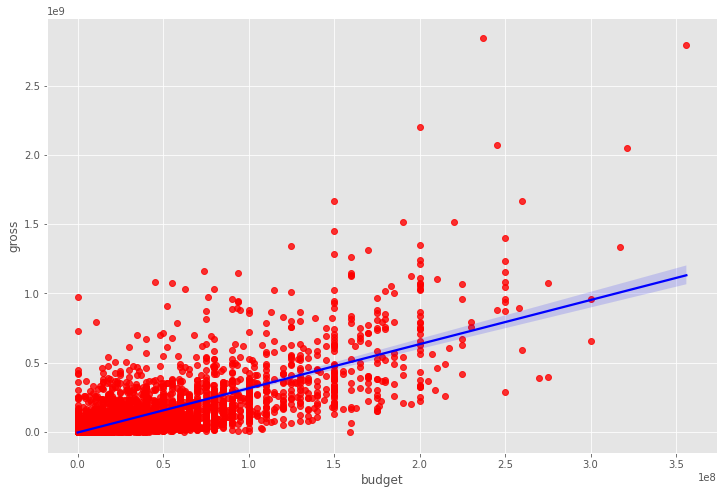

In [21]:
# Plot budget vs gross using seaborn
sns.regplot(x = df.budget, y = df.gross, data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

In [22]:
# Let's start looking at correlation
df.corr(method = 'pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,0.312521
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.045473
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,0.070314
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,0.108069
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,0.090394
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
year_correct,0.312521,0.045473,0.070314,0.108069,0.090394,0.120636,1.000000


In [ ]:
# high correlation between budget and gross

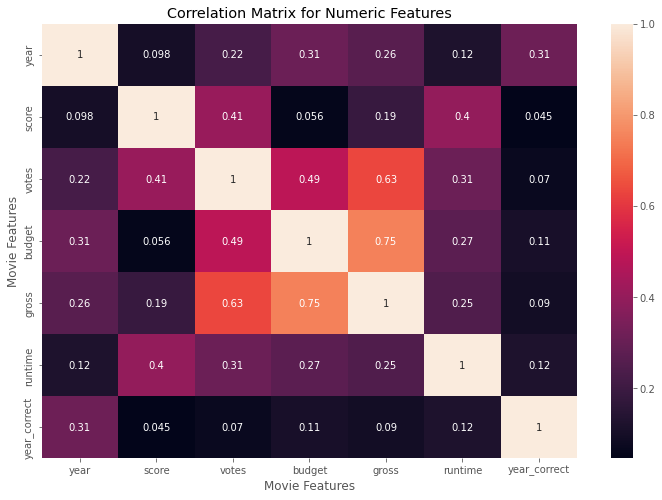

In [26]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [27]:
# Looks at company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [38]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,533,5,0,2009,697,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009
7445,535,5,0,2019,184,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019
3045,6896,5,6,1997,705,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997
6663,5144,5,0,2015,699,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015
7244,536,5,0,2018,193,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018


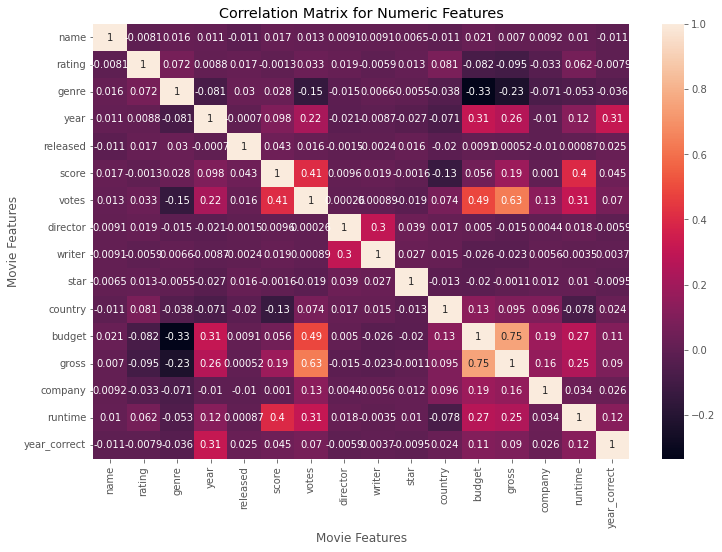

In [31]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [32]:
df_numerized.corr(method = 'pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,-0.010642
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,-0.007922
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.035768
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.312521
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,0.024619
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.045473
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.070314
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.005853
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,0.003654
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.009503


In [39]:
correlation_mat = df_numerized.corr()

correlation_pairs = correlation_mat.unstack()

correlation_pairs.head()


name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [40]:
sorted_pairs = correlation_pairs.sort_values()

sorted_pairs.head()

budget  genre    -0.334021
genre   budget   -0.334021
gross   genre    -0.234297
genre   gross    -0.234297
        votes    -0.145307
dtype: float64

In [35]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross         votes           0.632834
votes         gross           0.632834
budget        gross           0.750157
gross         budget          0.750157
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings
